이 자료는 위키독스 딥 러닝을 이용한 자연어 처리 입문의 영어/한국어 Word2Vec 실습 학습 자료입니다.  
링크 : https://wikidocs.net/50739

In [2]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 69.0 MB/s eta 0:00:00


In [3]:
import gensim
gensim.__version__

'4.4.0'

In [4]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 88.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.9/495.9 kB 43.1 MB/s eta 0:00:00


# 1. 영어 Word2Vec

In [9]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [10]:
import urllib.request
import zipfile
from lxml import etree
import re
from nltk.tokenize import word_tokenize, sent_tokenize

In [11]:
# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7d5a40f15f70>)

In [12]:
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

In [13]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


In [14]:
# 샘플 3개만 출력
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


In [17]:
# Word2Vec 라이브러리 불러오기
from gensim.models import Word2Vec
from gensim.models import KeyedVectors   # (사전 학습된 임베딩을 불러올 때 사용하는 클래스)

In [18]:
# 🧠 Word2Vec 모델 생성
# sentences=result : 학습에 사용할 문장들의 리스트 (토큰화된 문장들)
# vector_size=100  : 각 단어를 100차원 벡터로 표현 (벡터의 크기)
# window=5         : 중심 단어 기준으로 앞뒤 5개 단어까지를 ‘문맥(context)’으로 사용
# min_count=5      : 전체 데이터에서 등장 빈도가 5회 미만인 단어는 무시
# workers=4        : 동시에 학습할 CPU 코어 개수 (병렬 처리 속도 향상)
# sg=0             : 학습 방식 선택 (0=CBOW, 1=Skip-Gram)
#                    - CBOW: 주변 단어로 중심 단어를 예측 (빠르고 일반적)
#                    - Skip-Gram: 중심 단어로 주변 단어를 예측 (희귀 단어에 강함)

model = Word2Vec(
    sentences=result,   # 학습 데이터 (토큰화된 문장)
    vector_size=100,    # 임베딩 벡터 크기 (100차원)
    window=5,           # 주변 단어 범위 (좌우 5개)
    min_count=5,        # 최소 등장 횟수 기준
    workers=4,          # CPU 코어 수
    sg=0                # 0=CBOW / 1=Skip-Gram
)

# ✅ 이렇게 학습된 model은 각 단어의 의미를 벡터 형태로 표현함
# 예: model.wv['apple'] → "apple" 단어의 100차원 벡터 값 확인 가능
# 예: model.wv.most_similar('king') → "king"과 의미가 비슷한 단어 출력

여기서 Word2Vec의 인자는 다음과 같습니다.  

* vector_size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
* window = 컨텍스트 윈도우 크기
* min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
* workers = 학습을 위한 프로세스 수
* sg = 0은 CBOW, 1은 Skip-gram.

In [19]:
# ✅ 'man'과 의미적으로 비슷한 단어들을 찾아보는 코드 예시

# model.wv.most_similar("man")
# → 학습된 Word2Vec 모델에서 'man' 단어와 가장 비슷한 단어들을 찾아줌
# → 단어 벡터 간의 '코사인 유사도(cosine similarity)'를 이용해 유사도 계산
# → 결과는 [(단어, 유사도점수), (단어, 유사도점수), ...] 형태로 반환됨

model_result = model.wv.most_similar("man")   # 'man'과 비슷한 단어 10개 기본 출력
print(model_result)  # 결과 출력

[('woman', 0.8413154482841492), ('guy', 0.8322019577026367), ('boy', 0.7783945202827454), ('lady', 0.7750139832496643), ('girl', 0.7536750435829163), ('gentleman', 0.7308338284492493), ('soldier', 0.7267463207244873), ('kid', 0.7195513248443604), ('poet', 0.6948344111442566), ('surgeon', 0.6776267290115356)]


In [20]:
# 💾 Word2Vec 모델 저장 및 불러오기 예제

# ----------------------------------------------------------
# ✅ 1. 학습된 Word2Vec 모델을 파일로 저장하기
# ----------------------------------------------------------
# model.wv.save_word2vec_format('eng_w2v')
# - 현재 학습된 모델의 단어 벡터(임베딩 정보)를 'eng_w2v'라는 파일로 저장
# - 확장자는 생략 가능하지만, 일반적으로 .txt 또는 .vec 형태로 저장함
#   예: 'eng_w2v.txt' 또는 'eng_w2v.vec'
# - 저장된 파일에는 각 단어와 그 단어의 벡터값(숫자)이 들어 있음
model.wv.save_word2vec_format('eng_w2v')

# ----------------------------------------------------------
# ✅ 2. 저장된 모델 불러오기
# ----------------------------------------------------------
# KeyedVectors.load_word2vec_format("eng_w2v")
# - 위에서 저장한 'eng_w2v' 파일을 불러와서 다시 사용할 수 있도록 로드
# - 학습을 새로 하지 않고, 기존 임베딩 값을 그대로 불러와 사용할 수 있음
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v")

In [21]:
# ----------------------------------------------------------
# ✅ 3. 불러온 모델 사용 예시
# ----------------------------------------------------------
# loaded_model.most_similar("king")  → 'king'과 의미적으로 비슷한 단어 출력
# loaded_model['apple']              → 'apple' 단어의 벡터값 확인

model_result = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.8413154482841492), ('guy', 0.8322019577026367), ('boy', 0.7783945202827454), ('lady', 0.7750139832496643), ('girl', 0.7536750435829163), ('gentleman', 0.7308338284492493), ('soldier', 0.7267463207244873), ('kid', 0.7195513248443604), ('poet', 0.6948344111442566), ('surgeon', 0.6776267290115356)]


# 2. 한국어 Word2Vec

In [22]:
# 📦 1. 데이터 처리와 시각화를 위한 기본 라이브러리 불러오기
import pandas as pd                 # pandas: 표(테이블) 형태의 데이터 다루기 (엑셀처럼)
import matplotlib.pyplot as plt     # matplotlib: 그래프, 시각화 도구

# 🌐 2. 웹에서 데이터 파일을 다운로드하기 위한 모듈
import urllib.request               # 인터넷에서 파일을 가져올 때 사용 (예: 데이터셋 다운로드)

# 📊 3. 작업 진행 상황을 시각적으로 보여주는 진행바(progress bar)
from tqdm import tqdm               # for문 실행 시 진행 상태를 한눈에 볼 수 있음 (예: 데이터 전처리 시)

# 🧠 4. Word2Vec 모델 불러오기
from gensim.models.word2vec import Word2Vec
# gensim: 자연어처리(NLP)에서 자주 쓰이는 라이브러리
# Word2Vec: 단어를 벡터(숫자 형태)로 변환해주는 모델

# 🇰🇷 5. 한국어 형태소 분석기 불러오기
from konlpy.tag import Okt          # konlpy: 한국어 형태소 분석용 라이브러리
# Okt(Open Korean Text): 문장을 단어 단위(형태소)로 분리하는 기능
# 예: "자연어처리는 재미있어요" → ['자연어', '처리', '는', '재미있', '어요']

In [23]:
# 🌐 네이버 영화 리뷰 데이터(nsmc)를 인터넷에서 다운로드하는 코드

# urllib.request.urlretrieve( "URL", filename="저장할_파일명" )
# → 지정한 인터넷 주소(URL)의 파일을 다운로드하여, 내 컴퓨터에 원하는 파일 이름으로 저장함

urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt",  # 다운로드할 파일의 인터넷 주소
    filename="ratings.txt"  # 내 컴퓨터에 저장할 이름 (현재 폴더에 ratings.txt로 저장)
)

# ✅ 실행 결과:
# 현재 작업 폴더(코드 실행한 위치)에 "ratings.txt" 파일이 생성됩니다.
# 이 파일은 네이버 영화 리뷰(문장 + 감정 라벨)가 들어 있는 텍스트 데이터입니다.

('ratings.txt', <http.client.HTTPMessage at 0x7d5a22ef4c50>)

In [24]:
# 📘 네이버 영화 리뷰 데이터 파일(ratings.txt)을 불러와서 데이터프레임 형태로 읽기

import pandas as pd  # (pandas가 이미 import 되어 있어야 함)

# pd.read_table('파일명')
# → 탭(tab)으로 구분된 텍스트 파일을 불러오는 함수
#   CSV 파일을 읽을 때는 read_csv()를, 탭으로 구분된 파일은 read_table()을 사용함

train_data = pd.read_table('ratings.txt')

# ✅ 실행 결과:
# train_data 변수 안에 네이버 영화 리뷰 데이터가 표(DataFrame) 형태로 저장됩니다.
# 예시)
#      id                                   document  label
# 0  9976970                   아 더빙.. 진짜 짜증나네요 목소리      0
# 1  3819312       흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않네      1
# 2 10265843                                 너무재밓었다그래서보는것을추천한다      0
# ...

# ▶ 각 컬럼 설명:
# - id: 리뷰의 고유 번호
# - document: 리뷰 내용(문장)
# - label: 감정 라벨 (0 = 부정, 1 = 긍정)

In [ ]:
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [25]:
# 🧾 전체 리뷰 개수(행 개수)를 출력하는 코드

# len(train_data)
# → train_data 데이터프레임에 들어 있는 전체 행(row)의 개수를 구함
#   즉, '리뷰가 몇 개 있는지'를 알려줌

print('리뷰 개수 :', len(train_data))

# ✅ 실행 예시:
# 리뷰 개수 : 200000
# (데이터셋에는 약 20만 개의 영화 리뷰가 들어 있음)

리뷰 개수 : 200000


In [26]:
# 🧩 데이터 안에 비어 있는 값(NULL, NaN)이 있는지 확인하는 코드

# train_data.isnull()
# → 각 셀(데이터 항목)이 비어 있으면 True, 값이 있으면 False로 표시함

# train_data.isnull().values
# → True/False 값들을 numpy 배열 형태로 변환

# train_data.isnull().values.any()
# → 배열 안에 True가 하나라도 있으면 True 반환 (즉, 비어 있는 데이터가 존재함)
# → 모든 값이 채워져 있으면 False 반환

print('NULL 값 존재 유무 :', train_data.isnull().values.any())

# ✅ 실행 예시:
# NULL 값 존재 유무 : True   ← 일부 리뷰가 비어 있음
# (또는)
# NULL 값 존재 유무 : False  ← 모든 리뷰가 채워져 있음

NULL 값 존재 유무 : True


In [27]:
# 🧹 Null(결측값)이 들어 있는 행을 전부 삭제하는 코드

# train_data.dropna(how='any')
# → 결측값(NULL, NaN)이 '하나라도(any)' 포함된 행(row)을 제거
# → 즉, 리뷰 내용(document)이나 라벨(label)이 비어 있으면 그 행 전체를 삭제함

train_data = train_data.dropna(how='any')  # Null 값이 있는 행 삭제

# 삭제 후, 다시 Null 값이 남아 있는지 확인
print('NULL 값 존재 유무 :', train_data.isnull().values.any())

# ✅ 실행 예시:
# NULL 값 존재 유무 : False
# → 모든 결측값이 정상적으로 제거되었다는 의미

NULL 값 존재 유무 : False


In [ ]:
print('리뷰 개수 :',len(train_data))

리뷰 개수 : 199992


In [28]:
# 🧹 정규 표현식(Regular Expression)을 사용해서
#     리뷰 텍스트에서 '한글이 아닌 문자'를 모두 제거하는 코드

# train_data['document']
# → 영화 리뷰가 들어 있는 열(column)

# .str.replace("패턴", "바꿀문자")
# → 문자열 안에서 특정 패턴을 찾아 바꿔줌
# 여기서는 한글이 아닌 문자들을 "" (빈 문자열)로 바꿔서 삭제함

# 정규식 설명: [^ㄱ-ㅎㅏ-ㅣ가-힣 ]
# ▪ [ ] : 문자 집합
# ▪ ^ : '이 문자들을 제외한' 이라는 의미
# ▪ ㄱ-ㅎ : 자음 범위
# ▪ ㅏ-ㅣ : 모음 범위
# ▪ 가-힣 : 완성된 한글 음절
# ▪ 공백( ) 포함
# → 즉, 한글과 공백을 제외한 모든 문자(영어, 숫자, 특수문자 등)를 제거함

train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")

# ✅ 실행 결과 예시:
# 원래: "영화 너무 재미있어요!!! ㅋㅋㅋ Good~"
# 처리 후: "영화 너무 재미있어요 ㅋㅋㅋ"

# 영어, 숫자, 특수문자는 모두 사라지고 한글과 공백만 남게 됨

In [29]:
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [30]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
# 🧠 형태소 분석기 OKT를 이용한 토큰화(Tokenization) 과정
# (문장을 단어 단위로 쪼개고, 불필요한 단어 제거)
# ⚠️ 데이터가 많기 때문에 실행 시 약 20분 정도 걸릴 수 있음

from tqdm import tqdm   # 진행 상태를 보여주는 진행바

okt = Okt()  # OKT(Open Korean Text) 형태소 분석기 객체 생성

tokenized_data = []  # 토큰화된 문장들을 저장할 빈 리스트

# tqdm() → for문 진행 상황을 한눈에 볼 수 있도록 표시해줌
for sentence in tqdm(train_data['document']):

    # 1️⃣ 형태소 분석 및 토큰화
    # okt.morphs(sentence, stem=True)
    # → 문장을 단어(형태소) 단위로 나누고, 동사는 기본형(원형)으로 변환함
    # 예: "재미있었어요" → ["재미있다"]
    tokenized_sentence = okt.morphs(sentence, stem=True)

    # 2️⃣ 불용어(stopwords) 제거
    # 불용어란 자주 등장하지만 의미가 없는 단어 (예: "은", "는", "이", "가" 등)
    # 'if not word in stopwords' → 불용어 목록에 없는 단어만 남김
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords]

    # 3️⃣ 정제된 단어 리스트를 tokenized_data에 추가
    tokenized_data.append(stopwords_removed_sentence)

# ✅ 실행 결과:
# tokenized_data는 각 문장이 '형태소 단위 리스트'로 저장된 리스트의 리스트 형태가 됨
# 예시:
# [
#   ['영화', '재미있다', '추천하다'],
#   ['배우', '연기', '좋다', '스토리', '별로다'],
#   ...
# ]

 18%|█▊        | 36325/199992 [01:11<04:06, 664.90it/s]

In [ ]:
print(tokenized_data[:3])

[['어리다', '때', '보고', '지금', '다시', '보다', '재밌다', 'ㅋㅋ'], ['디자인', '을', '배우다', '학생', '외국', '디자이너', '그', '일군', '전통', '을', '통해', '발전', '문화', '산업', '부럽다', '사실', '우리나라', '에서도', '그', '어렵다', '시절', '끝', '까지', '열정', '을', '지키다', '노라노', '같다', '전통', '있다', '저', '같다', '사람', '꿈', '을', '꾸다', '이루다', '나가다', '수', '있다', '것', '감사하다'], ['폴리스스토리', '시리즈', '부터', '뉴', '까지', '버리다', '하나', '없다', '최고']]


리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


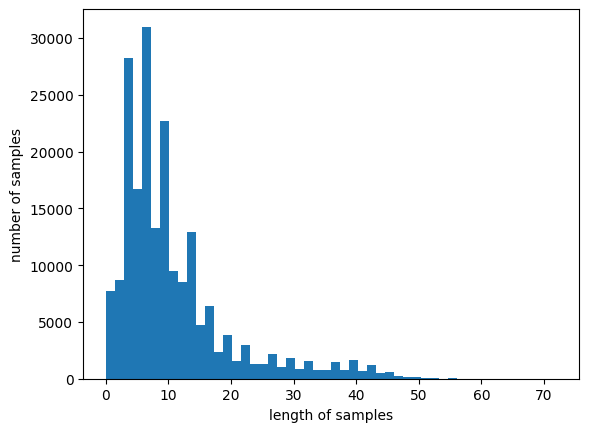

In [ ]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
from gensim.models import Word2Vec

In [ ]:
model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [ ]:
print('완성된 임베딩 매트릭스의 크기 확인 :', model.wv.vectors.shape)

완성된 임베딩 매트릭스의 크기 확인 : (16477, 100)


In [ ]:
print(model.wv.most_similar("최민식"))

[('한석규', 0.8795193433761597), ('안성기', 0.8745977282524109), ('김명민', 0.8648231625556946), ('김수현', 0.8571472764015198), ('박중훈', 0.8523020148277283), ('송강호', 0.8382790088653564), ('설경구', 0.8279197812080383), ('윤제문', 0.8265255093574524), ('엄태웅', 0.8250567317008972), ('이민호', 0.8234192728996277)]


In [ ]:
print(model.wv.most_similar("히어로"))

[('슬래셔', 0.8624646663665771), ('느와르', 0.8582134246826172), ('호러', 0.8564848303794861), ('물의', 0.851243793964386), ('블랙', 0.8409926891326904), ('무협', 0.8357768654823303), ('블록버스터', 0.8331990242004395), ('무비', 0.8258812427520752), ('헐리우드', 0.8137089014053345), ('물', 0.8070505261421204)]


In [ ]:
print(model.wv.most_similar("발연기"))

[('연기', 0.758121132850647), ('어색', 0.7345728874206543), ('연기력', 0.7304934859275818), ('발음', 0.7244566679000854), ('조연', 0.7157142758369446), ('사투리', 0.7052367925643921), ('캐스팅', 0.6964720487594604), ('미스캐스팅', 0.6796514391899109), ('주연', 0.659852147102356), ('신하균', 0.6586893796920776)]


# 3. 사전 훈련된 Word2Vec

In [ ]:
import gensim
import urllib.request

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## 원래 예제 코드: 해당 파일이 없어 에러가 발생함
# urllib.request.urlretrieve("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz", \
#                           filename="GoogleNews-vectors-negative300.bin.gz")

## 수정된 코드
# 1. 사전 학습된 Word2Vec 파일을 아래 링크에서 다운로드
#    https://code.google.com/archive/p/word2vec/
#      or
#    https://drive.google.com/file/d/1ikNHEMqN0RYFwFf0m9t1Jr0hei_Hehqu/view?usp=share_link

# 2. 자신의 구글 드라이브에 다운로드 받은 파일을 업로드하고 마운트한 후 해당 파일 경로를 복사하여 아래 코드에 추가
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/공유/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [ ]:
print(word2vec_model.vectors.shape)

(3000000, 300)


In [ ]:
print(word2vec_model.similarity('this', 'is'))
print(word2vec_model.similarity('post', 'book'))

0.40797037
0.057204384


In [ ]:
print(word2vec_model['book'])

[ 0.11279297 -0.02612305 -0.04492188  0.06982422  0.140625    0.03039551
 -0.04370117  0.24511719  0.08740234 -0.05053711  0.23144531 -0.07470703
  0.21875     0.03466797 -0.14550781  0.05761719  0.00671387 -0.00701904
  0.13183594 -0.25390625  0.14355469 -0.140625   -0.03564453 -0.21289062
 -0.24804688  0.04980469 -0.09082031  0.14453125  0.05712891 -0.10400391
 -0.19628906 -0.20507812 -0.27539062  0.03063965  0.20117188  0.17382812
  0.09130859 -0.10107422  0.22851562 -0.04077148  0.02709961 -0.00106049
  0.02709961  0.34179688 -0.13183594 -0.078125    0.02197266 -0.18847656
 -0.17480469 -0.05566406 -0.20898438  0.04858398 -0.07617188 -0.15625
 -0.05419922  0.01672363 -0.02722168 -0.11132812 -0.03588867 -0.18359375
  0.28710938  0.01757812  0.02185059 -0.05664062 -0.01251221  0.01708984
 -0.21777344 -0.06787109  0.04711914 -0.00668335  0.08544922 -0.02209473
  0.31835938  0.01794434 -0.02246094 -0.03051758 -0.09570312  0.24414062
  0.20507812  0.05419922  0.29101562  0.03637695  0.04